In [1]:
import warnings
warnings.filterwarnings("ignore")

import requests
import ipaddress

<IMG src="./images/Notebook/Slide1.jpeg">

* Jupyter Ascending - movie from 2015
* Wachowskis - matrix fame, v for vendetta

<IMG src="./images/Notebook/Slide2.jpeg">

* Take aways
* get interested in the subject
* not an expert in any of this
* changes since it was oringally crafted in 2019
* Understand the need
* Where does it fit in the SOC
* How can you integrate this into your job
* Steps to get started

<IMG src="./images/Notebook/Slide3.jpeg">

* talk about last presentation and how the presentation is:
 * a combination of powerpoint slides as jpeg, 
 * notes and pictures in HTML, 
 * code as run in jupyter, and 
 * reveal.js

<IMG src="./images/Notebook/Slide4.jpeg">

* History of notebook technologies
 * Progression - IPython - Jupyter - Cloud - Resource using Jupyter

<IMG src="./images/Notebook/Slide5.jpeg">

* Tons of things to do with Jupyter
 * Kernels that interoperate with each other
 * Markdowns to take notes with 
  * Metadata
 * Plug-ins for all sorta - Django, Google API, Git, Dask, Bokeh
 * JupyterHub for Collaboration - Wikipedia reference to LIGO and Gravitational Waves
 * Custom hotkeys

In [3]:
# What a Jupyter cell looks like

#bounce to a shell
!ls -la

# magic commands
%run ../../../Desktop/notebooks/codeChunk/lillyMailer.ipynb

total 1152
drwxr-xr-x  17 c266770  staff     544 Jul 28 16:15 .
drwxr-xr-x  11 c266770  staff     352 Jul 14 13:01 ..
-rw-r--r--@  1 c266770  staff   12292 Jul 28 16:15 .DS_Store
drwxr-xr-x  12 c266770  staff     384 Jul 24 16:07 .git
drwxr-xr-x   3 c266770  staff      96 Jul 20 16:20 .ipynb_checkpoints
drwxr-xr-x   5 c266770  staff     160 Dec  3  2018 Downloads
-rw-r--r--@  1 c266770  staff  218180 Jul 28 16:14 Notebook.pptx
-rw-r--r--@  1 c266770  staff   22196 Jul 28 16:15 TPTIPpresentation.ipynb
-rw-r--r--@  1 c266770  staff  302311 Jul 28 16:09 TPTIPpresentation.slides.html
-rw-r--r--   1 c266770  staff     143 Jul 26 20:46 api.pkl
drwxr-xr-x   3 c266770  staff      96 Jul 26 14:17 dask-worker-space
-rw-r--r--@  1 c266770  staff    9399 Jul 28 09:27 export.html
drwxr-xr-x   4 c266770  staff     128 Jul 24 12:28 images
-rw-r--r--@  1 c266770  staff     531 Apr  9  2019 notes
drwxr-xr-x  18 c266770  staff     576 Mar  2  2019 reveal.js
drwxr-xr-x   5 c266770  staff     160 Jul 26 2

,md5hash
0,866fcd320412a9fdd78aefc31372c74e
1,29c1a72fa565f339065d1f6c8a58de11
2,38acd35c1b04167823c83bbd8a12352c
3,28b78a1ab9f541a0a85cb853eb556fe8
4,ac8c1fa592b1551fd57072c371b7c748


In [30]:
# show some of the fun out parsing for jupyter

# seperate development env through anaconda
import pandas as pd
import os
some_directory = '/tmp'

test = ['866fcd320412a9fdd78aefc31372c74e', #Filezilla
        '29c1a72fa565f339065d1f6c8a58de11', #Fake AV - Ming web report
        '38acd35c1b04167823c83bbd8a12352c', #Packer - RDPOn.exe
        '28b78a1ab9f541a0a85cb853eb556fe8', #Adware - Coupons
        'ac8c1fa592b1551fd57072c371b7c748'] #Asparnet

df = pd.DataFrame(test, columns=['md5hash'])

df

,md5hash
0,866fcd320412a9fdd78aefc31372c74e
1,29c1a72fa565f339065d1f6c8a58de11
2,38acd35c1b04167823c83bbd8a12352c
3,28b78a1ab9f541a0a85cb853eb556fe8
4,ac8c1fa592b1551fd57072c371b7c748


* magic
* shell
* pandas

<IMG src="./images/Notebook/Slide6.jpeg">

<IMG src="./images/Notebook/Slide7.jpeg">

In [4]:
#%pip install geoip2

#https://dev.maxmind.com/geoip/geoip2/geolite2/
#This product includes GeoLite2 data created by MaxMind, available from
#<a href="http://www.maxmind.com">http://www.maxmind.com</a>

import geoip2.database
reader = geoip2.database.Reader('Downloads/GeoLite2-City.mmdb')

In [5]:
import pandas 
import os
import numpy as np
from multiprocessing import cpu_count, Pool
from functools import partial

directory = 'sample/ids'
df_ids = pandas.DataFrame()

#contains reports with source address
files = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
for file in files:
    df_temp = pandas.read_csv(file)
    df_ids = pandas.concat([df_ids, df_temp], sort=False)
    
#get rid of reports source address that start with 40
df_ids = df_ids[-((df_ids["Source Address"].str.startswith('40.')) &
                  (df_ids["Destination Address"].str.startswith('40.')))].reset_index()

#create a couple copies of the data frame for purposes of demo
df_ids2 = df_ids.copy()
df_ids3 = df_ids.copy()

In [6]:
%%time 
#magic function

#function to take across dataframe
def lookup_addy(row):
    if row["Source Address"].startswith('40.'):
        return row["Destination Address"]
    else:
        return row["Source Address"]

#normal pandas dataframe apply
df_ids['outside_addy'] = df_ids.apply(lookup_addy, axis=1)

#get rid of all the rfc1918
df_ids = df_ids[-((df_ids['outside_addy'].str.startswith('10.')) |
                  (df_ids['outside_addy'].str.startswith('172.16.')) |
                  (df_ids['outside_addy'].str.startswith('172.2')) |
                  (df_ids['outside_addy'].str.startswith('192.168.')))]

CPU times: user 13.6 ms, sys: 1.57 ms, total: 15.1 ms
Wall time: 28.4 ms


In [7]:
%%time

def lookup_addy(row):
    if row["Source Address"].startswith('40.'):
        outside = row["Destination Address"]
    else:
        outside = row["Source Address"]
    try:
        if ipaddress.ip_address(outside).is_global:
            return outside
        else:
            return 'local'
    except:
        return 'local'
    
#normal pandas dataframe apply
df_ids['outside_addy'] = df_ids.apply(lookup_addy, axis=1)

df_ids = df_ids[-(df_ids['outside_addy'] == 'local')]

CPU times: user 20.2 ms, sys: 1.05 ms, total: 21.3 ms
Wall time: 20.8 ms


In [8]:
#set up a pool
cores = cpu_count() #Number of CPU cores on your system
partitions = cores  #Cores equal the number of splits to the dataframe

#function to apply
def lookup_addy2(row):
    if row["Source Address"].startswith('40.'):
        return row["Destination Address"]
    else:
        return row["Source Address"]

#break the data into sections and apply a function to the data
def parallelize(data, func):
    data_split = np.array_split(data, partitions)
    pool = Pool(cores)
    data = pandas.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

#application of the function on the data section using a normal dataframe apply
def run_on_subset(func, data_subset):
    return data_subset.apply(func, axis=1)

#pull all of it together
def parallelize_on_rows(data, func):
    return parallelize(data, partial(run_on_subset, func))

In [9]:
import time
#get the start time
start = time.time()

#execute it
df_ids2['outside_addy'] = parallelize_on_rows(df_ids2, lookup_addy2)

#get rid of all the rfc1918
df_ids2 = df_ids2[-((df_ids2['outside_addy'].str.startswith('10.')) |
                  (df_ids2['outside_addy'].str.startswith('172.16.')) |
                  (df_ids2['outside_addy'].str.startswith('192.168.')))]

#record the end time
end = time.time()

#find the difference
print(end - start)


0.24799680709838867


In [10]:
%%time 
#magic function

#dask dataframes
import dask.dataframe as dd

#create a client to perform the work and look at the progress - spawns a web server if in its own cell
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=4)
client

#create a dataframe from one of the copies - store in memory as it is small 
dd_ids3 = dd.from_pandas(df_ids3, npartitions=4).persist()

#use a dask apply dataframe equiv and gather the lazy results
dd_ids3['outside_addy'] = dd_ids3.apply(lookup_addy2, axis=1).compute()

#get rid of all the rfc1918
dd_ids3 = dd_ids3[-((dd_ids3['outside_addy'].str.startswith('10.')) |
                  (dd_ids3['outside_addy'].str.startswith('172.16.')) |
                  (dd_ids3['outside_addy'].str.startswith('192.168.')))]

#shutdown the client
client.close()

CPU times: user 912 ms, sys: 305 ms, total: 1.22 s
Wall time: 8.22 s


In [11]:
#create a function to find the lat/long of the addy based on maxmind reader
def lookup_location(outside_addy):
    try:
        response = reader.city(outside_addy)
        return round(response.location.latitude,3), round(response.location.longitude,3)
    except:
        #otherwise return a location off the coast of africa
        return 0,0

#function to get a dual output into different columns in a dataframe
#https://stackoverflow.com/questions/23690284/pandas-apply-function-that-returns-multiple-values-to-rows-in-pandas-dataframe
def apply_and_concat(dataframe, field, func, column_names):
    return pandas.concat((
                         dataframe,
                         dataframe[field].apply(
                         lambda cell: pandas.Series(func(cell), index=column_names))), axis=1)

df_ids = apply_and_concat(df_ids, 'outside_addy', lookup_location, ['latitude', 'longitude'])

In [12]:
#pickle library
import pickle
pickle_dir = os.path.join(os.getcwd(),'')
#open a pickled dictionary with my api keys - put it into a object
with open('api.pkl', 'rb') as f:
    api = pickle.load(f)

#a couple useful functions for dealing with pickle files
def save_obj(obj, name):
    with open(pickle_dir + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(pickle_dir + str(name) + '.pkl', 'rb') as f:
        return pickle.load(f)

In [13]:
#https://jupyter-gmaps.readthedocs.io/en/latest/tutorial.html
#conda install nodejs
#use package manager to install
#!pip install gmaps
#!jupyter lab build
import gmaps
import gmaps.datasets

gmaps.configure(api_key=api['googleMaps'])

In [14]:
#pandas chaining
#1 - group by lat/long
#2 - get the size of a column to consolidate groupby object
#3 - take it from a indexed series to a dataframe
#4 - reset the index so that groupby is flattened and can be referenced
#5 - rename the size column (0) to 'count'
df_plot = df_ids.groupby(['latitude', 'longitude']).size().to_frame().reset_index().rename(columns={0:'count'})

#show the first couple lines of the dataframe
df_plot.head(5)

,latitude,longitude,count
0,-34.603,-58.382,3
1,-33.450,-70.667,3
2,-33.438,-70.650,1
3,-29.000,24.000,2
4,-22.920,-43.331,1


In [15]:
#call google api
fig = gmaps.figure( map_type='HYBRID')

#put a heatmap on it
heatmap = gmaps.heatmap_layer(df_plot[['latitude', 'longitude']], weights=df_plot['count'])

#overlay
fig.add_layer(heatmap)

#display
#fig

from ipywidgets.embed import embed_minimal_html
embed_minimal_html('export.html', views=[fig])

In [16]:
from IPython.display import IFrame

IFrame(src='export.html', width=700, height=600)

<IMG src="./images/Notebook/Slide8.jpeg">

<IMG src="./images/Notebook/Slide9.jpeg">

In [17]:
import os
import csv
import pandas
import matplotlib.pyplot as plt

directory = 'sample/av/'
events = []

#av_daily_MM-DD-YYYY-HH-MM-SS.csv
for file in os.listdir(directory):
    if file.endswith('.csv') and file.startswith('av_daily'):
        date = file.split('_')[2].split('.')[0].split('-')[0:3]
        date = "-".join(date)
        #print(date)
        with open(directory+'/'+file) as csvfile:
            devicescsv = csv.reader(csvfile)
            for row in devicescsv:
                if len(row[0]) == 32 or len(row[0]) == 64:
                    row.append(date)
                    events.append(row)

In [18]:
#etl
labels = ['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10']
df_avReports = pandas.DataFrame.from_records(events, columns=labels)

#one vendor - mav
df_7u189lsy = df_avReports[df_avReports.col2 == '7u189lsy'][['col1','col4','col5','col10']]
df_7u189lsy = df_7u189lsy.rename(index=str, columns={'col1':'md5','col4':'src_host','col5':'av_sig','col10':'date'})
df_7u189lsy['date'] = pandas.to_datetime(df_7u189lsy['date'])

#another vendor - cy
df_opmhmvjb = df_avReports[df_avReports.col2 == 'opmhmvjb'][['col1','col5','col9','col10']]
df_opmhmvjb = df_opmhmvjb.rename(index=str, columns={'col1':'md5','col5':'src_host','col9':'av_sig','col10':'date'})
df_opmhmvjb['date'] = pandas.to_datetime(df_opmhmvjb['date'])

#more vendors - sym
df_ncutcy1q = df_avReports[df_avReports.col2 == 'ncutcy1q'][['col1','col5','col3','col10']]
df_ncutcy1q.col1 = df_ncutcy1q.col1.map(lambda x: x.lower())
df_ncutcy1q = df_ncutcy1q.rename(index=str, columns={'col1':'md5','col5':'src_host','col3':'av_sig','col10':'date'})
df_ncutcy1q['date'] = pandas.to_datetime(df_ncutcy1q['date'])

In [19]:
#combo
dfs = [df_7u189lsy, df_opmhmvjb, df_ncutcy1q]
df_avcombo = pandas.concat(dfs)

#hide stuff - sorta
#import codecs
#df_avcombo.av_sig = df_avcombo.av_sig.apply(lambda x: codecs.encode(x, 'rot_13'))
import hashlib, uuid # even better
df_avcombo.av_sig = df_avcombo.av_sig.apply(lambda x: hashlib.md5(x.encode('utf-8') + api['googleMaps'].encode('utf-8')).hexdigest())

#drop unneeded
df_avcombo = df_avcombo.drop(columns=['src_host'])

#display
df_avcombo.head(5)

,md5,av_sig,date
0,33d69197b12e28e83ba9e6053e8c4945,1446db0d5b9a54bf0066443f6980c31e,2019-07-12
1,33d69197b12e28e83ba9e6053e8c4945,1446db0d5b9a54bf0066443f6980c31e,2019-07-12
2,60ba496ace933d86f024793932341466,99fb94bcd3c3d4921f610622b0c47a32,2019-07-12
3,053eb9330db9c63867a20234a43e8cc8,2062d0e9f808a73d31209ae43ebc1818,2019-07-12
4,e87ec6660777194a7479284877aab97d,c4e0471108e6eeb9ef09473a7dad194b,2019-07-12


In [20]:
#grab a count of by date turn the timeseries into floats
y = df_avcombo.groupby('date').count()['md5'].map(lambda x: float(x))

#convert to df and make day bins
df_y = pandas.DataFrame(y)
df_y = df_y.asfreq('D')

#give a start calc and end calc for the model
start = len(df_y) -10
end = len(df_y) + 15

In [21]:
import statsmodels.api as sm

#all these numbers were tested using other things
mod = sm.tsa.statespace.SARIMAX(df_y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
#fit the model up
results = mod.fit()

In [22]:
#predict based on the start and end dates
pred_results = results.predict(start=start, end=end, dynamic=True)

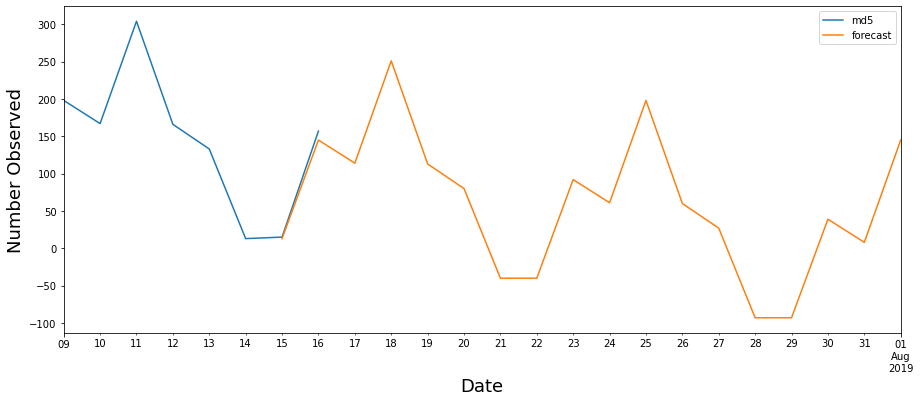

In [23]:
#plot with matplotlib
ax = df_y.plot(label='observed', figsize=(15, 6))
pred_results.plot(ax=ax, label='forecast')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number Observed', fontsize=18)
plt.legend()

In [31]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from math import pi # not cake
output_notebook()

df_bokeh = df_y.reset_index()

p = figure(x_axis_label ='Date', y_axis_label ='Count', x_axis_type='datetime', plot_width=900)

p.line(df_bokeh['date'], df_bokeh['md5'])

df_prediction = pred_results.to_frame().reset_index().rename(columns={'index':'date', 0:'md5'})

p.line(df_prediction['date'], df_prediction['md5'], color = 'orange')

p.xaxis.axis_label_text_font_size = '18pt'
p.yaxis.axis_label_text_font_size = '18pt'
p.xaxis.major_label_orientation = pi/4

Loading BokehJS ...

In [32]:
show(p)

In [56]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from math import pi # not cake
output_notebook()

df_bokeh = df_y.reset_index()

p = figure(x_axis_label ='Date', y_axis_label ='Count', x_axis_type='datetime', plot_width=900)

p.line(df_bokeh['date'], df_bokeh['md5'])

df_prediction = pred_results.to_frame().reset_index().rename(columns={'index':'date', 0:'md5'})

p.line(df_prediction['date'], df_prediction['md5'], color = 'orange')

p.xaxis.axis_label_text_font_size = '18pt'
p.yaxis.axis_label_text_font_size = '18pt'
p.xaxis.major_label_orientation = pi/4

Loading BokehJS ...

In [57]:
show(p)

<IMG src="./images/Notebook/Slide10.jpeg">

<IMG src="./images/Notebook/Slide11.jpeg">

<IMG src="./images/Notebook/Slide12.jpeg">

In [28]:
!jupyter-nbconvert --to slides ./TPTIPpresentation.ipynb \
--reveal-prefix=reveal.js \
--SlidesExporter.reveal_transition=zoom \
--SlidesExporter.reveal_scroll=True

[NbConvertApp] Converting notebook ./TPTIPpresentation.ipynb to slides
[NbConvertApp] Writing 387447 bytes to ./TPTIPpresentation.slides.html
